In [3]:
# 파이썬 크롤링 : naver view 목록 가져오기

In [4]:
import requests

In [5]:
res = requests.get(
    "https://search.naver.com/search.naver?where=view&sm=tab_jum&query=%EC%84%9C%EC%9A%B8%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80&qvt=0"
)

In [6]:
res

<Response [200]>

In [7]:
type(res)

requests.models.Response

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="서울미세먼지 : 네이버 VIEW검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'서울미세먼지\'의 네이버 VIEW검색 결과입니다."> <meta name="description" lang="ko" content="\'서울미세먼지\'의 네이버 VIEW검색 결과입니다."> <title>서울미세먼지 : 네이버 VIEW검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="h
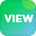

In [8]:
res.text

In [9]:
# beatifulSoup 
# - html , xml 에서 원하는 html 부분을 가져오는 라이브러리
import bs4

In [10]:
# features : txt 형태로 받아온 html 구조를 어떤 방식으로 해독할 해독기를 선택
# - 만약 html 형태가 아니라, json 형태로 들어왔다면 굳이 bs4 를 사용 X
# - perfect 한 html 혹은 xml 이라면, feature 가 문제가 되지는 않는다.
soup = bs4.BeautifulSoup(res.text, "lxml")

In [11]:
# select
ul_total_elements = soup.select("ul li")

In [12]:
type(ul_total_elements)

bs4.element.ResultSet

In [13]:
type(ul_total_elements[0])

bs4.element.Tag

In [14]:
# class 로 가져오기
# ex) lst_total _list_base 
# - 주의할점 : 중간에 space 가 있다
# - 즉, 2개의 class 가 있다는 것이다.
# - 따라서 space 가 있을 때는, 둘 중 하나만 명시해야 정상 작동한다.

# ex) ul_elements = soup.select("ul.lst_total li")
# .lst_total li : 중간에 space ? == 자식.
# 즉, lst_total 이라는 class 를 지닌 ul 의 자식들 중에서 li element 들을 가져와라
ul_elements = soup.select("ul.lst_total")

In [15]:
len(ul_elements)

1

In [16]:
ul_element = ul_elements[0];
li_elements = ul_element.select("li")
len(li_elements)

30

In [17]:
# > ? 직계 자손
# - 즉, lst_total 이라는 class 의 ul 의 직계자식들 중에서
# - _svp_item 이라는 class 의 li 들을 모두 가져와라
# - 왜 ">" 를 사용하는 것이 좋을까 ?
# - "ul.lst_total li._svp_item" 만 하게 되면, 직계 자손이 아니라
#    각각의 li 아래에 있는 _svp_item 이라는 class 를 지닌, 모든 li 들을 가져온다.
#    마치 타고 타고 들어가면서 조사한다는 것이다.
li_elements = soup.select("ul.lst_total > li._svp_item")

In [18]:
len(li_elements)

30

In [20]:
# select
len(soup.find_all("ul"))

11

In [21]:
len(soup.find_all("ul", class_ = "lst_total"))

1

In [24]:
# dictionary 형태로 전달하기
len(soup.find_all("ul", {"class" : "lst_total"}))

1

In [34]:
a = soup.find("ul", {"class" : "lst_total"})
type(a)

bs4.element.Tag

In [37]:
len(a.find_all("li"))

30

In [42]:
# recursive = false : 직계 자손
# select 에서 '>' 와 동일한 것
len(a.find_all("li", {"class" : "_svp_item"}, recursive = False))

30

In [45]:
# soup.select(".total_tag_area")
soup.find_all(class_="_svp_item")

[<li class="bx _svp_item" data-cr-area="rvw*b" data-cr-gdid="90000003_0000000000000033EF4BA320" data-cr-rank="1"> <div class="total_wrap api_ani_send"> <div class="total_area"> <div class="total_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://blog.naver.com/wooriedu3/223058043680" href="#" onclick="tCR('a=rvw*b.kep&amp;r=1&amp;i=90000003_0000000000000033EF4BA320&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=rvw*b.kepoff&amp;r=1&amp;i=90000003_0000000000000033EF4BA320&amp;u=javascript" data-cr-on="a=rvw*b.kepon&amp;r=1&amp;i=90000003_0000000000000033EF4BA320&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'a=rvw*b.kephome&amp;r=1&amp;i=90000003_0000000000000033EF4BA32

[<div id="nxtt_div" style="display:none;position:absolute;border-width:0;z-index:11000"></div>,
 <div id="u_skip"> <a href="#lnb"><span>메뉴 영역으로 바로가기</span></a> <a href="#content"><span>본문 영역으로 바로가기</span></a> </div>,
 <div id="wrap"><div id="header_wrap" role="heading"> <div class="api_floating_header"> <div class="gnb_wrap"> <div class="header_group"> <div class="search_area"> <h1 class="logo"><a class="link" href="https://www.naver.com" onclick="return goOtherCR(this, 'a=sta.naver&amp;r=&amp;i=&amp;u='+urlencode(this.href));"><i class="spnew ico_logo">NAVER</i></a></h1> <form action="?" id="nx_search_form" method="get" name="search" onsubmit="return nx_form_submit(this)" role="search"> <fieldset class="greenwindow"> <legend>검색</legend> <input name="sm" type="hidden" value="tab_hty.top"/> <input name="where" type="hidden" value="view"/> <div class="greenbox"> <input accesskey="s" autocomplete="off" class="box_window" data-atcmp-element="" id="nx_query" maxlength="255" name="query" pla
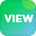
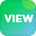
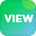
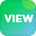
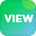
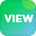

In [47]:
# 비록 섞이지만 div, li element 들 모두 가져오기
soup.find_all(["div", "li"])

In [48]:
# li, div 가 아닌, 다른 element 형태 가져오기
soup.find_all("panel-list",{"data-index" : "tag"})

[<panel-list data-index="tag"> <div class="_panel" data-index="topic0"> <more-contents> <div class="_more_contents_event_base"> <ul class="lst_total _list_base"> <li class="bx _svp_item" data-cr-area="rvw*b" data-cr-gdid="90000003_0000000000000033EF4BA320" data-cr-rank="1"> <div class="total_wrap api_ani_send"> <div class="total_area"> <div class="total_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://blog.naver.com/wooriedu3/223058043680" href="#" onclick="tCR('a=rvw*b.kep&amp;r=1&amp;i=90000003_0000000000000033EF4BA320&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=rvw*b.kepoff&amp;r=1&amp;i=90000003_0000000000000033EF4BA320&amp;u=javascript" data-cr-on="a=rvw*b.kepon&amp;r=1&amp;i=90000003_0000000000000033EF4BA320&amp;u=javascript" href="#" role="button">Keep에 저장</a> 

In [49]:
soup.select("panel-list[data-index='tag']")

[<panel-list data-index="tag"> <div class="_panel" data-index="topic0"> <more-contents> <div class="_more_contents_event_base"> <ul class="lst_total _list_base"> <li class="bx _svp_item" data-cr-area="rvw*b" data-cr-gdid="90000003_0000000000000033EF4BA320" data-cr-rank="1"> <div class="total_wrap api_ani_send"> <div class="total_area"> <div class="total_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://blog.naver.com/wooriedu3/223058043680" href="#" onclick="tCR('a=rvw*b.kep&amp;r=1&amp;i=90000003_0000000000000033EF4BA320&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=rvw*b.kepoff&amp;r=1&amp;i=90000003_0000000000000033EF4BA320&amp;u=javascript" data-cr-on="a=rvw*b.kepon&amp;r=1&amp;i=90000003_0000000000000033EF4BA320&amp;u=javascript" href="#" role="button">Keep에 저장</a> 

In [50]:
# 기타
# soup.head => 실제 head element 내용을 가져옴
# soup.body => 실제 body element
# soup.body['class'] => body element 의 class 목록 list 로 가져옴

In [ ]:
# 텍스트 데이터 가져오기
